# GPR using `mini-gpr`

[Gaussian process regression](https://en.wikipedia.org/wiki/Gaussian_process) (GPR) modelling is a powerful and flexible tool for regression problems, particularly in cases when we want to make quantify how un/certain a model is, and when we are interested in modelling the noise in some data, as well as the underlying mean value.

Let's use the `mini-gpr` package to explore what GPR can do. We'll start by generating a toy, 1D dataset:

## A toy system

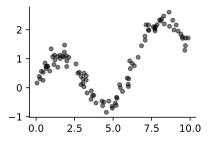

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from mini_gpr.tutorials import sample_toy_1d_system

x_train, y_train = sample_toy_1d_system()
plt.plot(x_train, y_train, "ok", alpha=0.5, ms=4);

## Model definition

GPR models are defined by specifying a [kernel](https://en.wikipedia.org/wiki/Kernel_(machine_learning)): this is a function that quantifies how similar two data locations are. 

GPR models use this information to determine how closely correlated the values of the function are at different locations.

Below we define a (very) simple "Radial basis function" kernel:



In [2]:
from mini_gpr.kernels import RBF
from mini_gpr.models import GPR

model = GPR(kernel=RBF(), noise=0.3)

There exist infinite functions of a 1D input. The kernel (and its hyperparameters) of a GPR model induces a [prior distribution](https://en.wikipedia.org/wiki/Prior_probability) over these functions. We can use the `sample_prior` method to draw samples from this distribution:

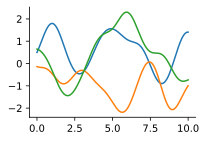

In [3]:
xx = np.linspace(0, 10, 250)
plt.plot(xx, model.sample_prior(xx, n_samples=3, rng=42));

Fitting the model to data favours functions that match the data well over those that do not. 

We can use the `fit` method to fit the model to the data, and then sample from the posterior distribution to see some of these:

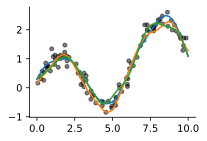

In [4]:
model.fit(x_train, y_train)

plt.plot(x_train, y_train, "ok", alpha=0.5, ms=4)
plt.plot(xx, model.sample_posterior(xx, n_samples=3, rng=42));

Finally, we can use the `predict` method to generate predictions at new locations: this generates a mean $f(x)$ value as a sum over all possible functions as weighted by their posterior probability given the data.

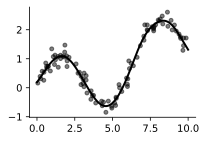

In [5]:
yy = model.predict(xx)
plt.plot(x_train, y_train, "ok", alpha=0.5, ms=4)
plt.plot(xx, yy, "k-", lw=2);

Beyond a simple posterior mean, GPR models also provide two measures of uncertainty:

1. the "latent" (or epistemic) uncertainty, which quantifies the model's uncertainty of the function's *mean value* at a given input;
2. the "predictive" (or aleatoric) uncertainty, which quantifies the model's uncertainty of the function's *value* at a given input.

Given a noise function with standard deviation $\sigma(x)$, and sufficient training data, the latent uncertainty should tend to zero, while the predictive uncertainty should tend to $\sigma(x)$.

We can use the `latent_uncertainty` and `predictive_uncertainty` methods to compute these uncertainties for a given GPR model:

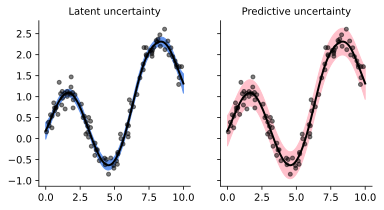

In [ ]:
latent_std = model.latent_uncertainty(xx)
yy_std = model.predictive_uncertainty(xx)

_, (left, right) = plt.subplots(1, 2, figsize=(6, 3), sharey=True)

for ax in (left, right):
    ax.plot(x_train, y_train, "ok", alpha=0.5, ms=4)
    ax.plot(xx, yy, "k-", lw=2)

left.fill_between(xx, yy - latent_std, yy + latent_std, color="cornflowerblue")
left.set_title("Latent uncertainty", fontsize=10)

right.fill_between(xx, yy - yy_std, yy + yy_std, color="pink")
right.set_title("Predictive uncertainty", fontsize=10);

In subsequent notebooks, we will default to showing the model's predictive uncertainty: a useful visualisation of this quantitiy for 1D systems is exposed by the `mini_gpr.viz.show_model_predictions` function:

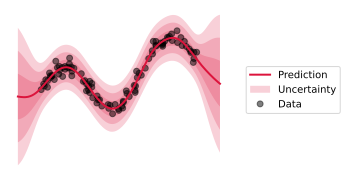

In [5]:
from mini_gpr.viz import show_model_predictions

show_model_predictions(model, x_train, y_train)